In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rc
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
# 예측/회귀 Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf

import statsmodels.formula.api as sml
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from statsmodels.tools.eval_measures import rmse

# 평가함수
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score

import os

In [77]:
df_member = pd.read_csv("./A2_유아용품/Member_data.csv")
df_product = pd.read_csv("./A2_유아용품/Product_data.csv")
df_sales = pd.read_csv("./A2_유아용품/Sales_data.csv")

print(df_member.shape)
print(df_sales.shape)

c:\Users\oldbo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(81360, 8)
(199999, 10)


c:\Users\oldbo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [78]:
df_member=pd.DataFrame(df_member)
df_member.head()
df_member.isnull().sum()

고객번호        0
성별        266
결혼유무      266
거주지역      266
연령        266
결제등록카드    266
유입경로      266
자녀여부      266
dtype: int64

In [79]:
df_member=df_member.drop(['성별','결혼유무','연령','결제등록카드', '유입경로', '자녀여부'], axis = 1)
df_member.head()
df_member.isnull().sum()

고객번호      0
거주지역    266
dtype: int64

In [80]:
df_sales.head()
df_sales.isnull().sum()

주문번호             0
구매일              0
배송시작일            0
배송완료일            0
구매시월령(수정)    31857
고객번호             0
구매금액             0
결제금액             0
물품대분류            0
상품명              0
dtype: int64

In [81]:
df_sales = df_sales.drop(['주문번호','구매일','배송시작일','배송완료일',\
    '구매시월령(수정)', '구매금액', '결제금액'], axis = 1)
df_sales.head()

,고객번호,물품대분류,상품명
0,201812310749735,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입)
1,201812310749735,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형)
2,201812310749770,FMC,크리넥스？키즈용？화장지？3겹？27m 8롤
3,201812310749771,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형)
4,201812310749774,기저귀,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형)


In [83]:
df_shipping = pd.merge(df_sales,df_member, on='고객번호', how='outer')
df_shipping.to_csv("./A2_유아용품/shipping.csv", encoding = "euc-kr")
df_shipping.head()

,고객번호,물품대분류,상품명,거주지역
0,201812310749735,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),인천
1,201812310749735,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),인천
2,201812310749770,FMC,크리넥스？키즈용？화장지？3겹？27m 8롤,제주
3,201812310749771,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),부산
4,201812310749774,기저귀,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형),경남


In [84]:
df_shipping.isnull().sum()

고객번호         0
물품대분류    13771
상품명      13771
거주지역     25611
dtype: int64

In [85]:
df_shipping

,고객번호,물품대분류,상품명,거주지역
0,201812310749735,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),인천
1,201812310749735,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),인천
2,201812310749770,FMC,크리넥스？키즈용？화장지？3겹？27m 8롤,제주
3,201812310749771,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),부산
4,201812310749774,기저귀,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형),경남
...,...,...,...,...
213765,201912181051567,NaN,NaN,경북
213766,201912181051577,NaN,NaN,서울
213767,201912181051582,NaN,NaN,서울
213768,201912181051590,NaN,NaN,전북


In [93]:
df_shipping = pd.merge(df_sales,df_member, on='고객번호', how='outer')
df_shipping

,고객번호,물품대분류,상품명,거주지역
0,201812310749735,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),인천
1,201812310749735,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),인천
2,201812310749770,FMC,크리넥스？키즈용？화장지？3겹？27m 8롤,제주
3,201812310749771,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),부산
4,201812310749774,기저귀,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형),경남
...,...,...,...,...
213765,201912181051567,NaN,NaN,경북
213766,201912181051577,NaN,NaN,서울
213767,201912181051582,NaN,NaN,서울
213768,201912181051590,NaN,NaN,전북


In [94]:
df_member = df_member.dropna()

In [95]:
df2 = pd.merge(df_member, df_sales, on='고객번호')

In [108]:
df3 = df2.groupby(['거주지역', '물품대분류'])['고객번호'].count()
df3 = df3.to_csv("./A2_유아용품/지역별 물품대분류.csv", encoding = "euc-kr")

ValueError: Could not interpret value `물품대분류` for parameter `x`

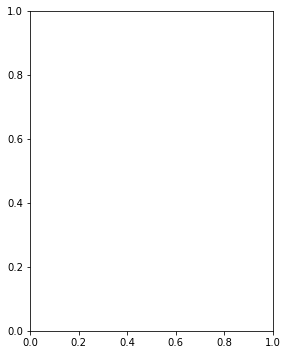

In [115]:
df3=pd.DataFrame(df3)

plt.figure(figsize=(20,20))
plt.subplot(3,4,1)
sns.lineplot(data=df3, x='물품대분류', y='고객번호').set(title='O3')